# SVM Classifier x Toxic Content Detection
Il presente Notebook mostra l'addestramento ed il testing di un Classificatore basato su SVM per il task di Toxic Content Detection.

I dati sono stati processati come segue:
1. Pulizia del testo (si veda, 'dataset_preprocessing.py')
2. Lemmatizzazione con NLTK
3. Vettorizzazione con TF-IDF

In [15]:
import pandas as pd
import pickle
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from datetime import datetime
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

All'interno del Notebook saranno addestrati due Classificatori SVM con Kernel Lineare, uno sul Dataset "non-Lemmatizzato" e l'altro sul Dataset "Lemmatizzato".

# LinearSVM, Dataset "non-Lemmatizzato"

## Addestramento

In [5]:
training_set = pd.read_csv("./../../datasets/training_set.csv")
print("Numero di Frasi nel Training Set:", len(training_set))
print("Numero Frasi 'toxic' nel Training Set:", len(training_set[training_set['toxic'] == 1]))
print("Numero Frasi 'not-toxic' nel Training Set:", len(training_set[training_set['toxic'] == 0]))

Numero di Frasi nel Training Set: 15282
Numero Frasi 'toxic' nel Training Set: 3058
Numero Frasi 'not-toxic' nel Training Set: 12224


In [6]:
y_train = training_set['toxic']

In [7]:
# Vettorizzazione con TF-IDF
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(training_set['comment_text'])
print("X_train.shape: " + str(X_train.shape))

X_train.shape: (15282, 39767)


In [8]:
cl = SVC(kernel='linear', probability=True, random_state=24, verbose=True)
model_filename = "linear_svm_classifier.pkl"

In [9]:
# Addestramento sul Dataset non-lemmatizzato
print("Training di LinearSVM sul Dataset 'non-Lemmatizzato'...")
start = datetime.now()
cl.fit(X=X_train, y=y_train)
end = datetime.now()
print("Training completato! Tempo impiegato: " + str(end-start))

with open(model_filename, 'wb') as f:
    pickle.dump(cl, f)

Training di LinearSVM sul Dataset 'non-Lemmatizzato'...
[LibSVM]Training completato! Tempo impiegato: 0:01:41.445152


In [10]:
# Caricamento del Modello pre-addestrato
with open(model_filename, 'rb') as f:
    cl = pickle.load(f)

## Testing

In [11]:
test_data = pd.read_csv("./../../datasets/test_set.csv")
test_data.dropna(inplace=True)

test_set = test_data[test_data['toxic'] != -1]
exp_set = test_data[test_data['toxic'] == -1]

print("Numero di Frasi nel Test Set:", len(test_set))
print("Numero Frasi 'toxic' nel Test Set:", len(test_set[test_set['toxic'] == 1]))
print("Numero Frasi 'not-toxic' nel Test Set:", len(test_set[test_set['toxic'] == 0]))

Numero di Frasi nel Test Set: 63842
Numero Frasi 'toxic' nel Test Set: 6087
Numero Frasi 'not-toxic' nel Test Set: 57755


In [12]:
y_test = test_set['toxic']

In [13]:
X_test = vectorizer.transform(test_set['comment_text'])
print("X_test.shape: " + str(X_test.shape))

X_test.shape: (63842, 39767)


In [16]:
y_pred = cl.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F-Measure: " + str(f1_score(y_test, y_pred)))

Accuracy: 0.9208514770840512
Precision: 0.562849501580355
Recall: 0.7606374240183998
F-Measure: 0.6469642981904562


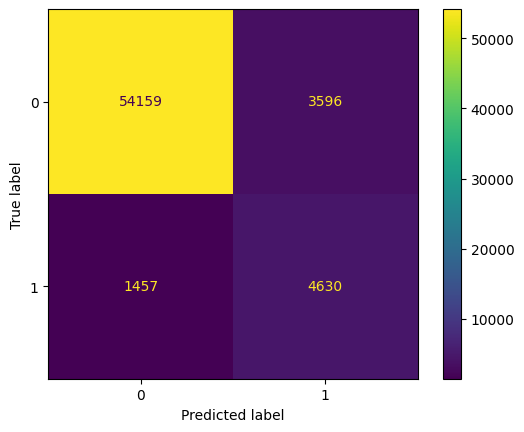

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cl.classes_)
disp.plot()
plt.show()

# LinearSVM, Dataset "Lemmatizzato"

## Addestramento

In [19]:
training_set_lem = pd.read_csv("./../../datasets/training_set_lemmatized.csv")

In [20]:
# Vettorizzazione con TF-IDF
vectorizer_lem = TfidfVectorizer()

X_train_lem = vectorizer_lem.fit_transform(training_set_lem['comment_text'])
print("X_train_lem.shape: " + str(X_train_lem.shape))

X_train_lem.shape: (15282, 34238)


In [21]:
cl_lem = SVC(kernel='linear', probability=True, random_state=24, verbose=True)
model_filename = "linear_svm_classifier_lem.pkl"

In [22]:
# Addestramento sul Dataset lemmatizzato
print("Training di LinearSVM sul Dataset 'Lemmatizzato'...")
start = datetime.now()
cl_lem.fit(X=X_train_lem, y=y_train)
end = datetime.now()
print("Training completato! Tempo impiegato: " + str(end-start))

with open(model_filename, 'wb') as f:
    pickle.dump(cl_lem, f)

Training di LinearSVM sul Dataset 'Lemmatizzato'...
[LibSVM]Training completato! Tempo impiegato: 0:01:25.135501


In [23]:
# Caricamento del Modello pre-addestrato
with open(model_filename, 'rb') as f:
    cl_lem = pickle.load(f)

## Testing

In [24]:
test_data_lem = pd.read_csv("./../../datasets/test_set_lemmatized.csv")
test_data_lem.dropna(inplace=True)

test_set_lem = test_data_lem[test_data_lem['toxic'] != -1]
exp_set_lem = test_data_lem[test_data_lem['toxic'] == -1]

In [25]:
X_test_lem = vectorizer_lem.transform(test_set_lem['comment_text'])
print("X_test_lem.shape: " + str(X_test_lem.shape))

X_test_lem.shape: (63842, 34238)


In [26]:
y_pred_lem = cl_lem.predict(X_test_lem)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_lem)))
print("Precision: " + str(precision_score(y_test, y_pred_lem)))
print("Recall: " + str(recall_score(y_test, y_pred_lem)))
print("F-Measure: " + str(f1_score(y_test, y_pred_lem)))

Accuracy: 0.919817674884872
Precision: 0.5569277816984239
Recall: 0.7778873008049942
F-Measure: 0.6491191993968058


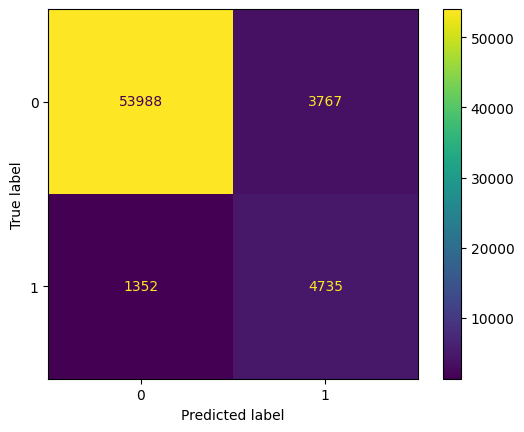

In [27]:
cm = confusion_matrix(y_test, y_pred_lem, labels=cl_lem.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cl_lem.classes_)
disp.plot()
plt.show()